In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt

In [3]:

df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [4]:

df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [5]:
column = ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv',names=column)

In [6]:
data.shape

(5001, 14)

In [7]:
df_loan = df

In [8]:
y= df_loan['Personal Loan']
df_loan.drop(['Personal Loan'], axis = 1,inplace = True)
df['Personal Loan'] = y
df_loan.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0
5,6,37,13,29,92121,4,0.4,2,155,0,0,1,0,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,1,0,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,1,0
8,9,35,10,81,90089,3,0.6,2,104,0,0,1,0,0
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1


In [9]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
df_loan.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
Personal Loan         False
dtype: bool

In [11]:
df_loan['Experience']

0        1
1       19
2       15
3        9
4        8
        ..
4995     3
4996     4
4997    39
4998    40
4999     4
Name: Experience, Length: 5000, dtype: int64

Imputation is a process of replacing missing values with substituted values. In our dataset, some columns have missing values. We can replace missing values with mean, median, mode or any particular value. Sklearn provides Imputer() method to perform imputation in 1 line of code. We just need to define missing_values, axis, and strategy. We are using “median” value of the column to substitute with the missing value.

In [12]:
df_loan[df_loan['Experience'] == -2]['Experience'].count()

15

In [13]:
df_loan['Experience'].replace( to_replace= -1,value = np.nan,inplace = True )
df_loan['Experience'].replace( to_replace= -2,value = np.nan,inplace = True )
df_loan['Experience'].replace( to_replace= -3,value = np.nan,inplace = True )
df_loan['Experience'].isnull().sum()

52

In [14]:
df_loan['Experience'].fillna(df_loan['Experience'].median(),inplace=True)
df_loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [15]:
df.Experience.describe()

count    5000.000000
mean       20.327600
std        11.253035
min         0.000000
25%        11.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [16]:
df_loan.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
ID,1.000000,-0.008473,-0.009339,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.016972,-0.006909,-0.002528,0.017028,-0.024801
Age,-0.008473,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681,-0.007726
Experience,-0.009339,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048718,0.018074,-0.013365,-0.000465,0.005526,0.013459,0.008834,-0.014013
Income,-0.017695,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385,0.502462
ZIP Code,0.013432,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.004704,0.019972,0.016990,0.007691,0.000107
Family,-0.016797,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588,0.061367
CCAvg,-0.024675,-0.052012,-0.048718,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689,0.366889
Education,0.021463,0.041334,0.018074,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014,0.136722
Mortgage,-0.013920,-0.012539,-0.013365,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231,0.142095
Securities Account,-0.016972,-0.000436,-0.000465,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028,0.021954


In [17]:
df_loan["Personal Loan"].value_counts()# the aim here is a customer buying personal loans. hence target is personal loans

0    4520
1     480
Name: Personal Loan, dtype: int64

C:\Users\ShilpaS_aku3vci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

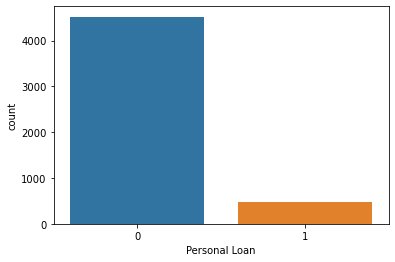

In [18]:
sns.countplot(df_loan["Personal Loan"])

In [19]:
#Findings 

#All the columns/attributes have 5000 non-null values.
#There is no null value present in the data frame.

#Total 52 negative values in Experience as Experience can't have negative values hence replacing it with a median

# ID:  This attribute can be dropped. Though the data distribution is normal.

# Age: Three small peaks can be indicating three values of age would be slightly more in number.

# Education: Mean and median are almost equal. 

# Income:  Data for the less income customers is more in the sample.

#  ZIP Code: The attribute has sharp peaks telling the data from particular places are collected more. .

# Family: It has 4 peaks(4 values), families with the least member is the highest in the sample.

# Mortgage: most customers are having least mortgage while very few have some mortgage.

# Securities Account:  majority of the customers are not having a Security account.

# CD account: Most of the customers don’t have CD accounts.

# Online: Higher number of customers use online banking in the sample.

#Credit Card: This attribute has fewer customers using CC in comparison to the CC users.




In [21]:
count_no_buyers = len(df_loan[df_loan['Personal Loan']==0])
print('count_no_buyers :',count_no_buyers)
count_buyers = len(df_loan[df_loan['Personal Loan']==1])
print('count_buyers :',count_buyers)
pct_of_no_buyers = count_no_buyers/(count_no_buyers+count_buyers)
print('pct_of_no_buyers')
print("percentage of no buyers is", pct_of_no_buyers*100)
pct_of_buyers = count_buyers/(count_no_buyers+count_buyers)
print("percentage of buyers", pct_of_buyers*100)

count_no_buyers : 4520
count_buyers : 480
pct_of_no_buyers
percentage of no buyers is 90.4
percentage of buyers 9.6


In [22]:
a = df_loan.var()
a[a<1]

Education             0.705380
Securities Account    0.093519
CD Account            0.056763
Online                0.240678
CreditCard            0.207606
Personal Loan         0.086801
dtype: float64

In [23]:
#Personal loans is having a comparatively better relation with Income.

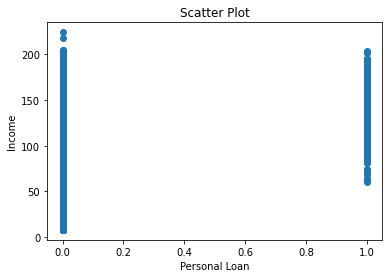

In [24]:
plt.scatter(df['Personal Loan'], df['Income'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Personal Loan')
plt.ylabel('Income')
  
plt.show()

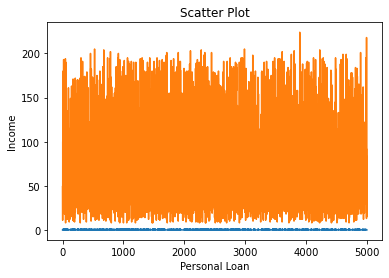

In [25]:
plt.plot(df['Personal Loan'])
plt.plot(df['Income'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Personal Loan')
plt.ylabel('Income')
  
plt.show()

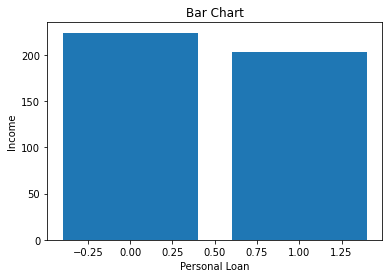

In [26]:
plt.bar(df['Personal Loan'], df['Income'])
  
plt.title("Bar Chart")
  
# Setting the X and Y labels
plt.xlabel('Personal Loan')
plt.ylabel('Income')
  
# Adding the legends
plt.show()

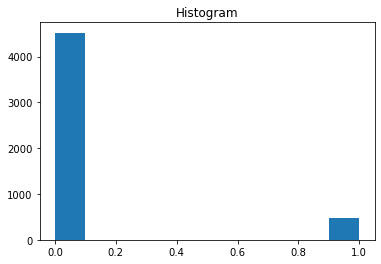

In [27]:
plt.hist(df['Personal Loan'])
  
plt.title("Histogram")
  
# Adding the legends
plt.show()

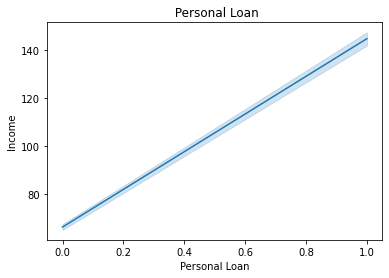

In [28]:
sns.lineplot(x="Personal Loan", y="Income", data=df)
  
# setting the title using Matplotlib
plt.title(' Personal Loan')
  
plt.show()

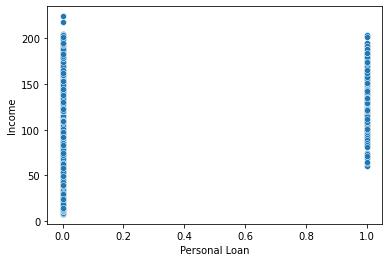

In [29]:
  
sns.scatterplot(x='Personal Loan', y='Income', data=df,)
plt.show()

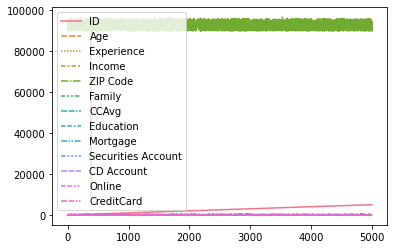

In [30]:
sns.lineplot(data=df.drop(['Personal Loan'], axis=1))
plt.show()

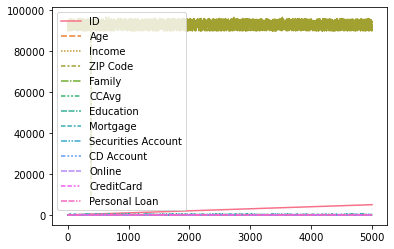

In [31]:
sns.lineplot(data=df.drop(['Experience'], axis=1))
plt.show()

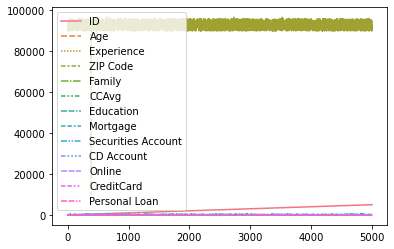

In [32]:
sns.lineplot(data=df.drop(['Income'], axis=1))
plt.show()

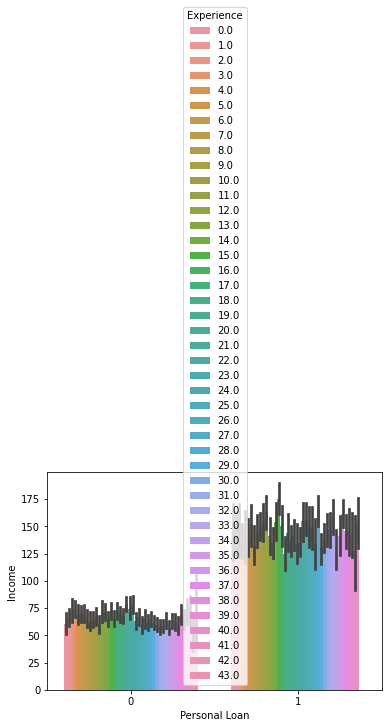

In [33]:
sns.barplot(x='Personal Loan',y='Income', data=df, 
            hue='Experience')
  
plt.show()

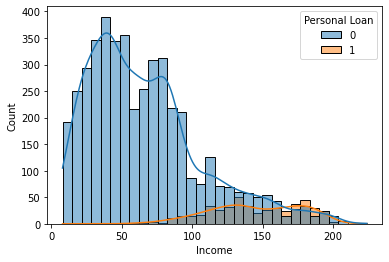

In [34]:
sns.histplot(x='Income', data=df, kde=True, hue='Personal Loan')
  
plt.show()

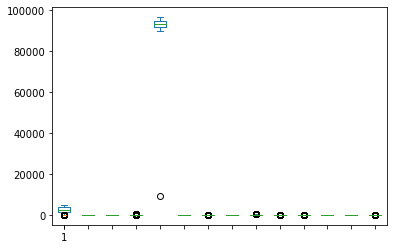

In [35]:
df.plot.box()
  
# individual attribute box plot
plt.boxplot(df['Personal Loan'])
plt.show()

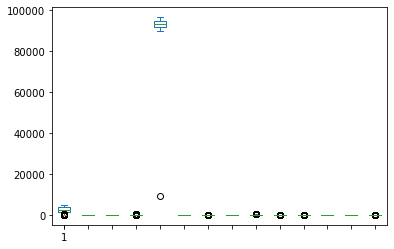

In [36]:
df.plot.box()
  
# individual attribute box plot
plt.boxplot(df['Income'])
plt.show()

<AxesSubplot:ylabel='Personal Loan'>

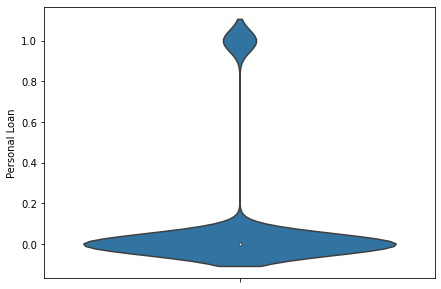

In [37]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize =(7, 5))
sns.violinplot( ax = ax, y = df["Personal Loan"] )

<AxesSubplot:ylabel='Experience'>

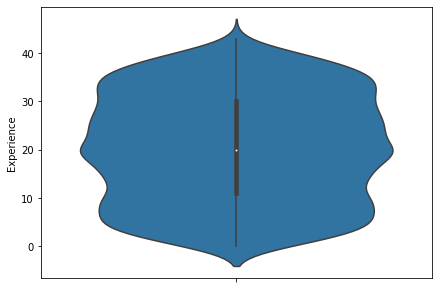

In [38]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize =(7, 5))
sns.violinplot( ax = ax, y = df["Experience"] )

<AxesSubplot:ylabel='Income'>

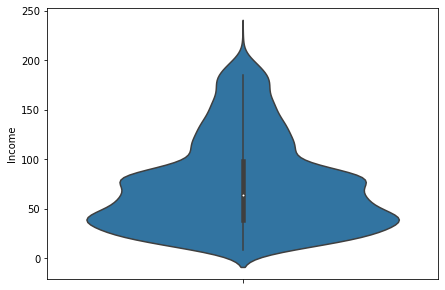

In [39]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize =(7, 5))
sns.violinplot( ax = ax, y = df["Income"] )

In [40]:
df_loan.drop(columns ='Experience',inplace= True)
df_loan.drop(columns ='ID',inplace=True)
df_loan.head(2)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,49,91107,4,1.6,1,0,1,0,0,0,0
1,45,34,90089,3,1.5,1,0,1,0,0,0,0


<AxesSubplot:>

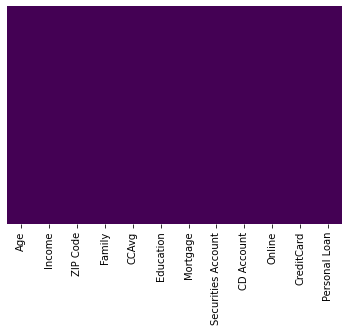

In [41]:
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')

In [42]:
df.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
Personal Loan           2
dtype: int64

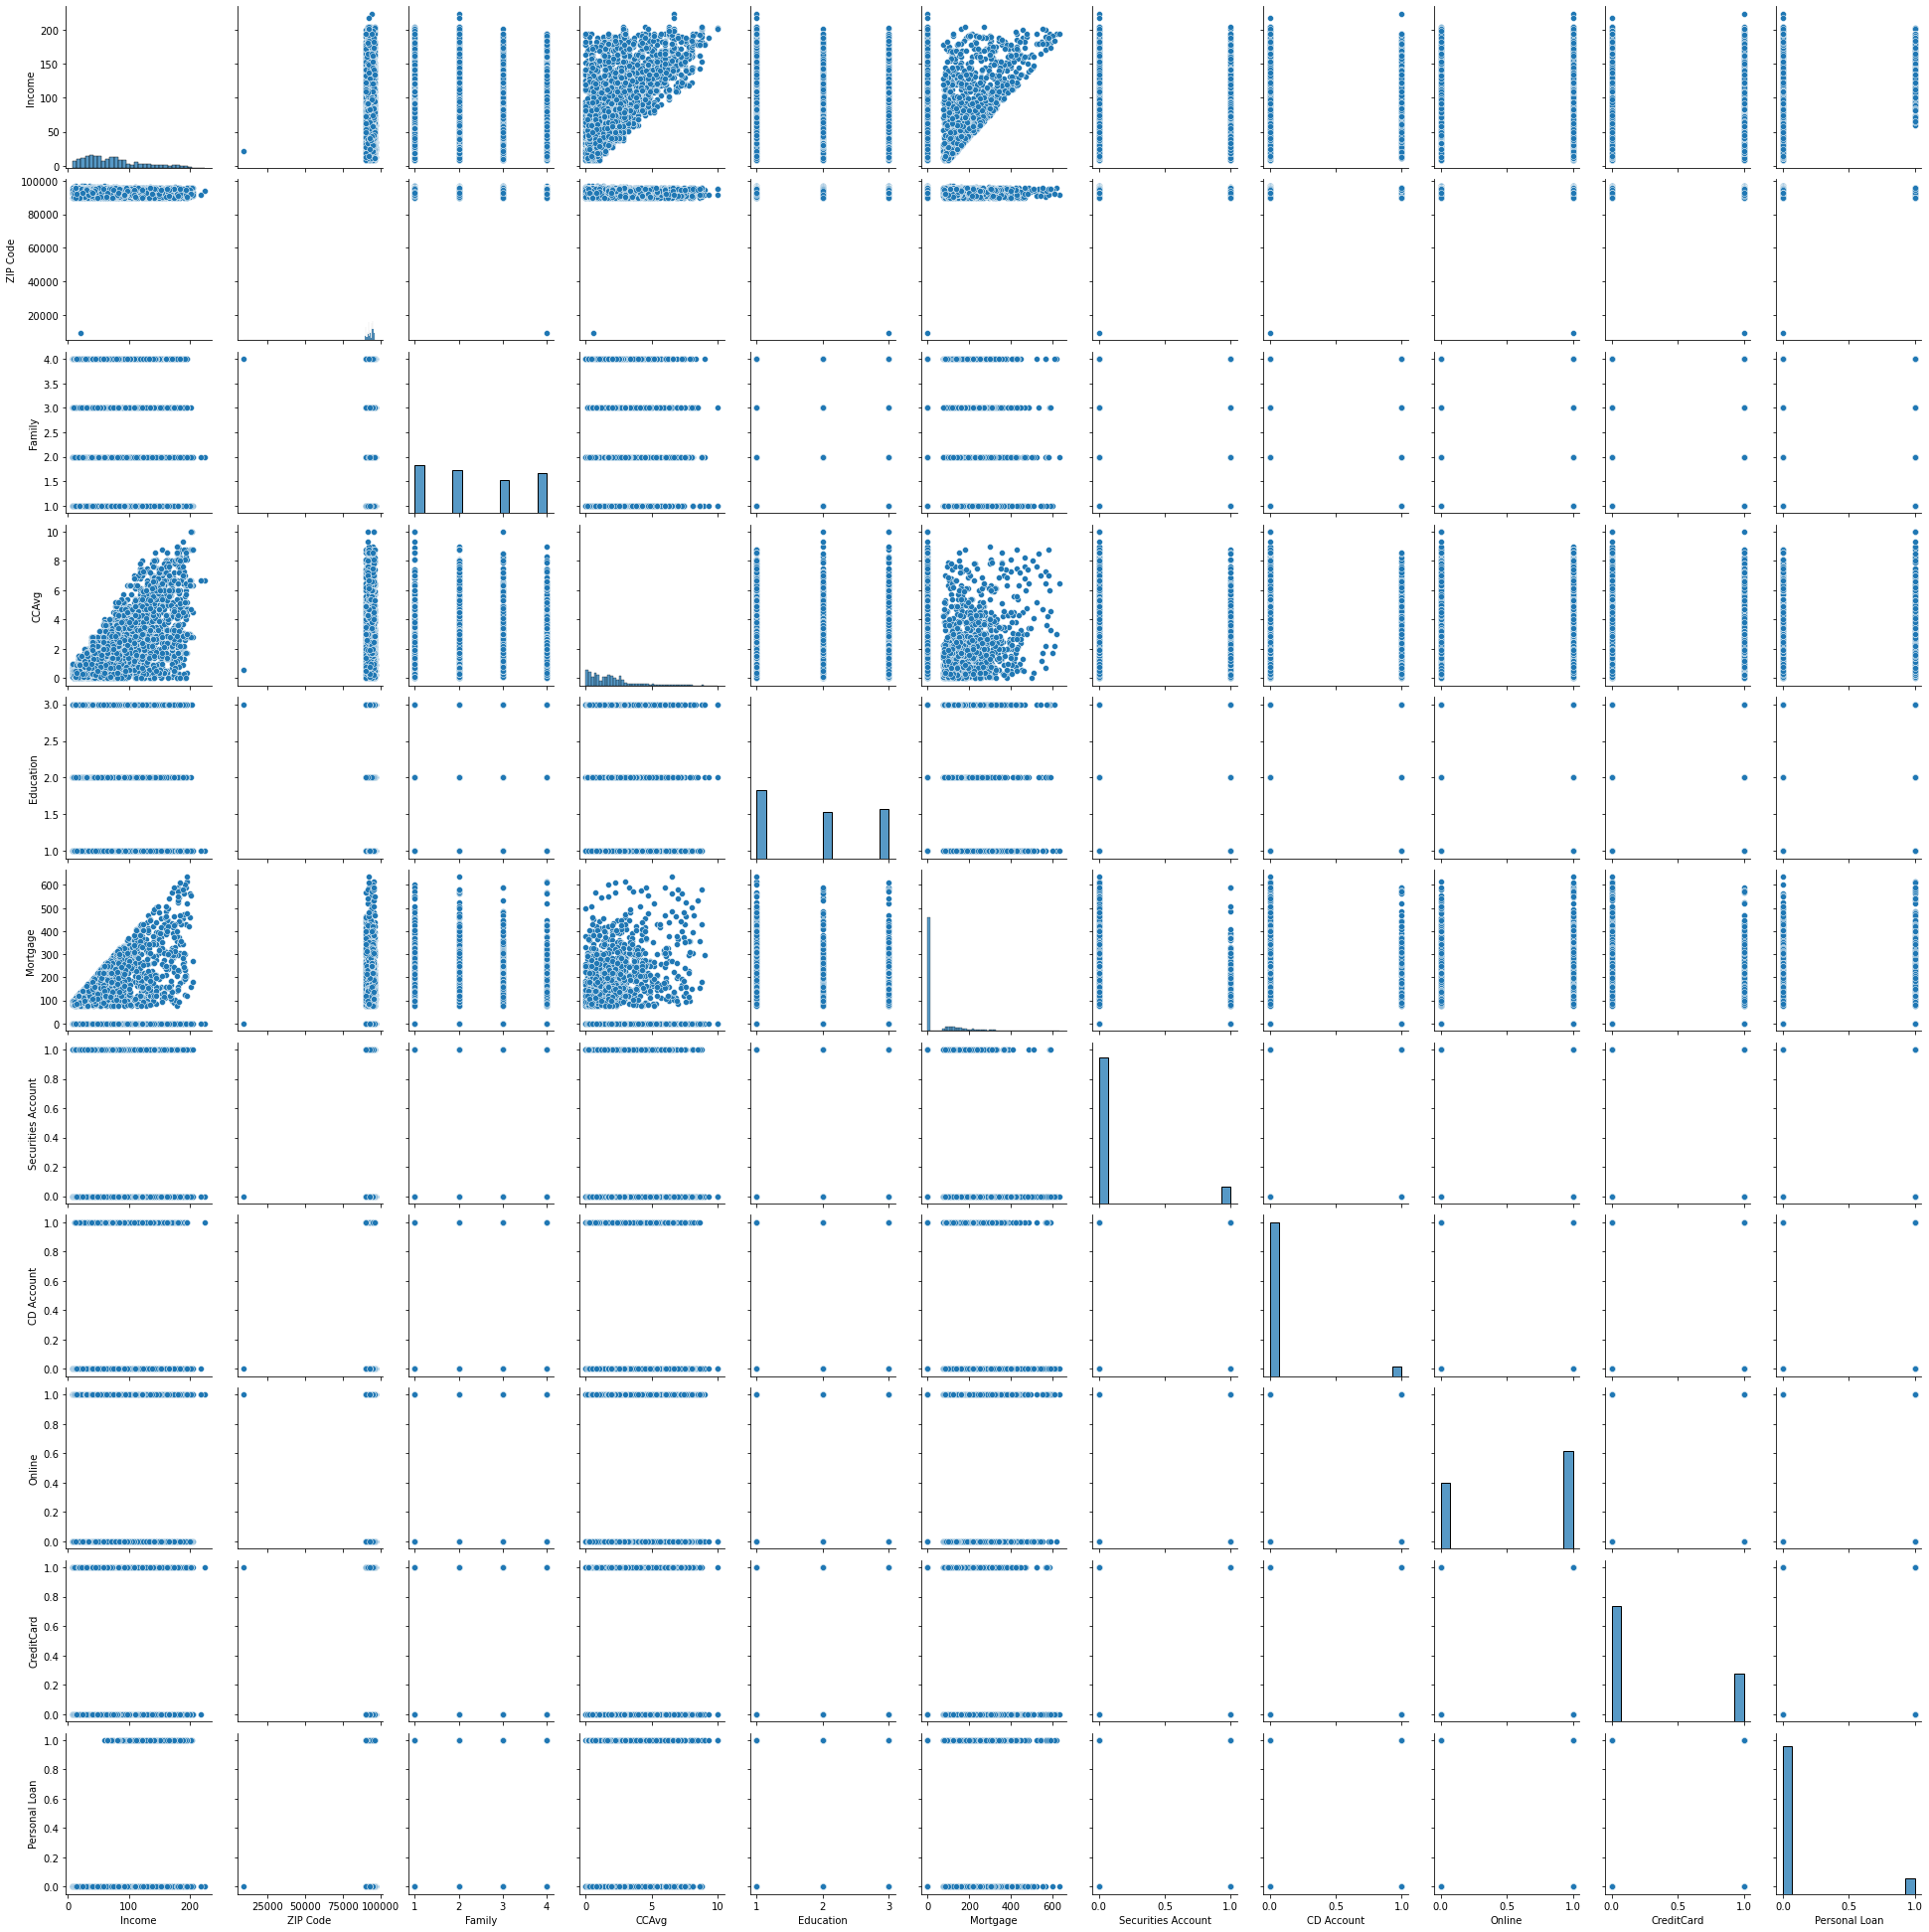

In [43]:
sns.pairplot(df.iloc[:,1:])

C:\Users\ShilpaS_aku3vci\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

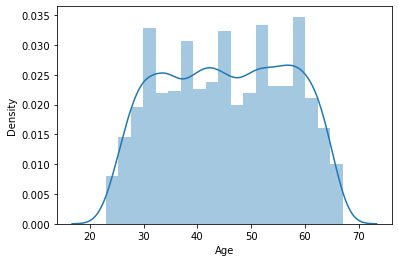

In [44]:
sns.distplot(df['Age'])

C:\Users\ShilpaS_aku3vci\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

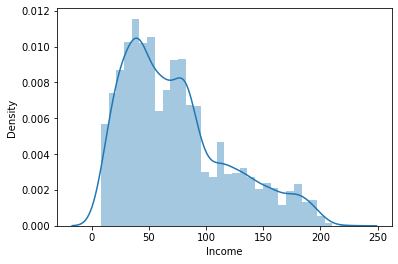

In [45]:
sns.distplot(df['Income'])

C:\Users\ShilpaS_aku3vci\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ZIP Code', ylabel='Density'>

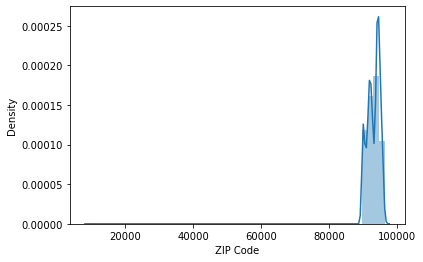

In [46]:
sns.distplot(df['ZIP Code'])

C:\Users\ShilpaS_aku3vci\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

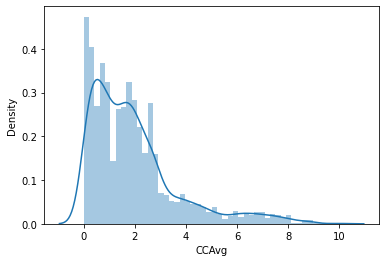

In [47]:
sns.distplot(df['CCAvg'])

C:\Users\ShilpaS_aku3vci\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Education', ylabel='Density'>

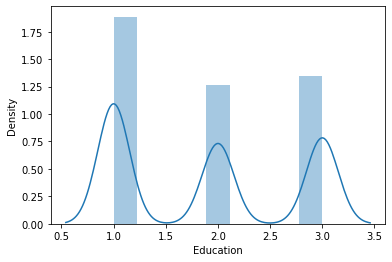

In [48]:
sns.distplot(df['Education'])

C:\Users\ShilpaS_aku3vci\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mortgage', ylabel='Density'>

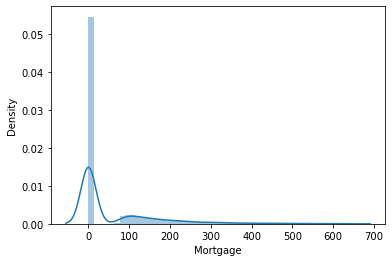

In [49]:
sns.distplot(df['Mortgage'])

C:\Users\ShilpaS_aku3vci\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Online', ylabel='Density'>

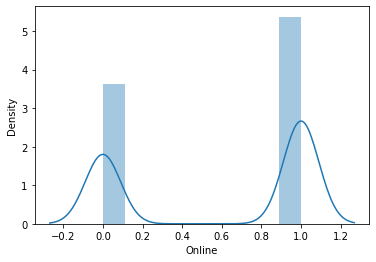

In [50]:
sns.distplot(df['Online'])

C:\Users\ShilpaS_aku3vci\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CreditCard', ylabel='Density'>

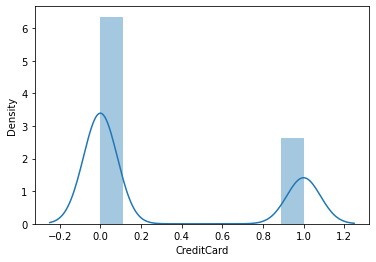

In [51]:
sns.distplot(df['CreditCard'])

In [52]:
loan_counts = pd.DataFrame(df["Personal Loan"].value_counts()).reset_index()
loan_counts.columns =["Labels","Personal Loan"]
loan_counts

,Labels,Personal Loan
0,0,4520
1,1,480


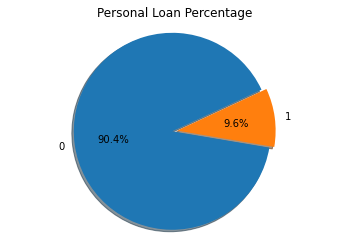

In [53]:
fig1, ax1 = plt.subplots()
explode = (0, 0.05)
ax1.pie(loan_counts["Personal Loan"], explode=explode, labels=loan_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=25)
ax1.axis('equal')  
plt.title("Personal Loan Percentage")
plt.show()

C:\Users\ShilpaS_aku3vci\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ShilpaS_aku3vci\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ShilpaS_aku3vci\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ShilpaS_aku3vci\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


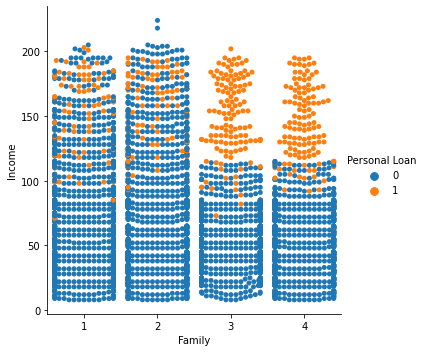

In [54]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = df, kind='swarm')

<AxesSubplot:xlabel='Education', ylabel='Income'>

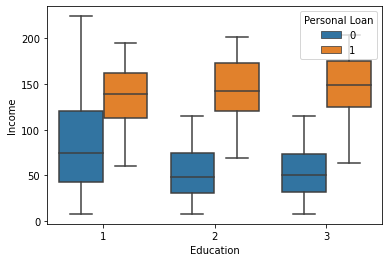

In [55]:
sns.boxplot(x='Education', y='Income', hue='Personal Loan', data = df)

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

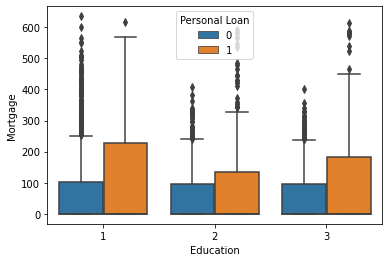

In [56]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=df)

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

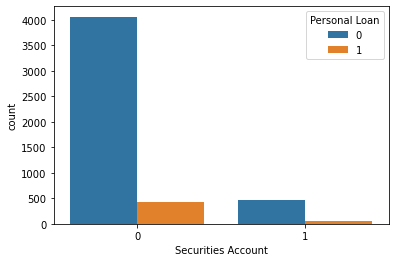

In [57]:
sns.countplot(x="Securities Account", data=df,hue="Personal Loan")

<AxesSubplot:xlabel='Family', ylabel='count'>

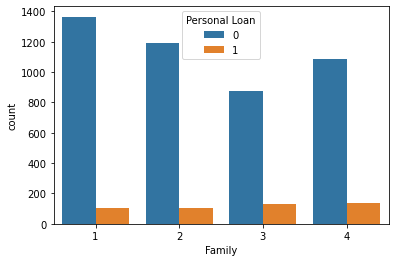

In [58]:
sns.countplot(x='Family',data=df,hue='Personal Loan')

<AxesSubplot:xlabel='CD Account', ylabel='count'>

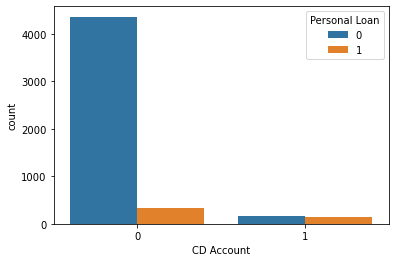

In [59]:
sns.countplot(x='CD Account',data=df,hue='Personal Loan')

<AxesSubplot:xlabel='CreditCard', ylabel='CCAvg'>

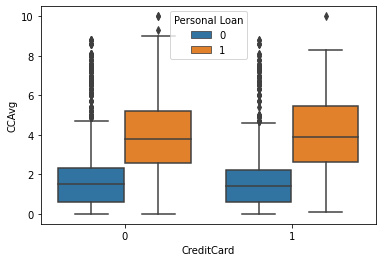

In [60]:
sns.boxplot(x="CreditCard", y='CCAvg', hue="Personal Loan", data=df)

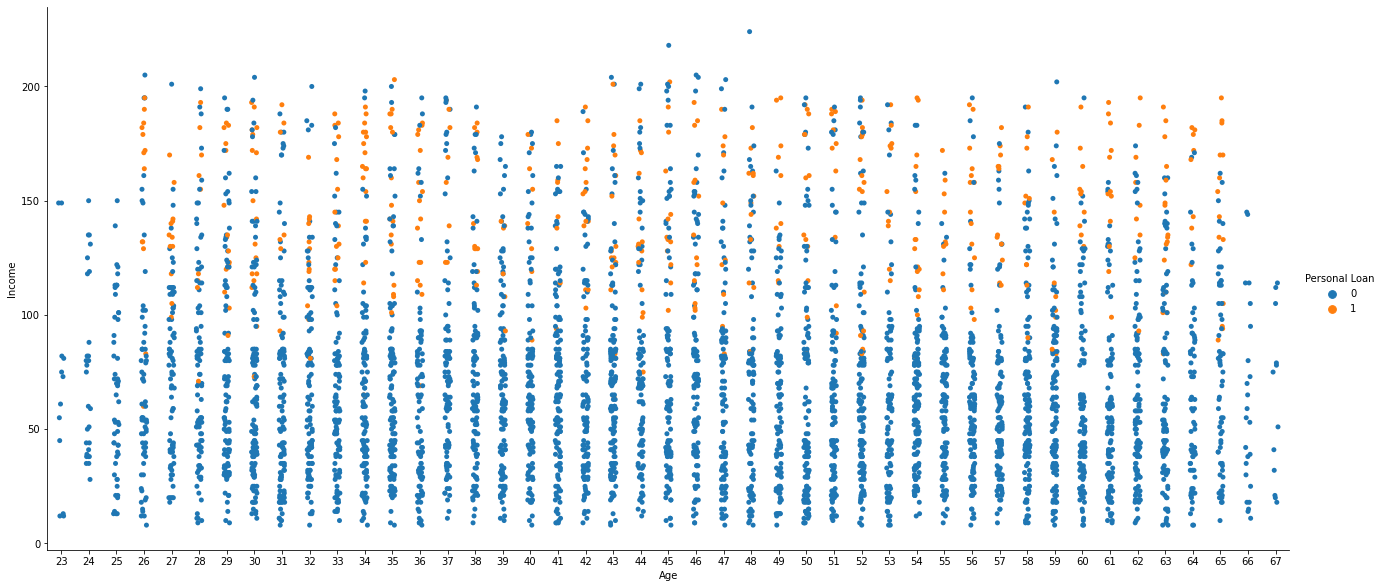

In [61]:
sns.catplot(x='Age', y='Income', hue='Personal Loan', data = df, height=8.27, aspect=11/5)

C:\Users\ShilpaS_aku3vci\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ShilpaS_aku3vci\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CCAvg Distribution')

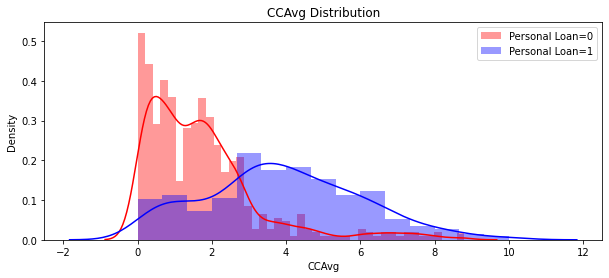

In [62]:
plt.figure(figsize=(10,4))
sns.distplot(df[df["Personal Loan"] == 0]['CCAvg'], color = 'r',label='Personal Loan=0')
sns.distplot(df[df["Personal Loan"] == 1]['CCAvg'], color = 'b',label='Personal Loan=1')
plt.legend()
plt.title("CCAvg Distribution")

In [63]:
print('Credit card spending of Non-Loan customers: ',df[df['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', df[df['Personal Loan'] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


C:\Users\ShilpaS_aku3vci\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ShilpaS_aku3vci\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Income Distribution')

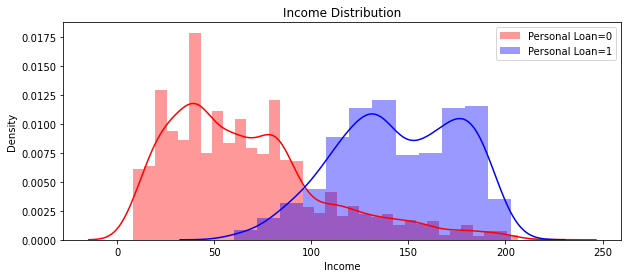

In [64]:
plt.figure(figsize=(10,4))
sns.distplot(df[df["Personal Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0')
sns.distplot(df[df["Personal Loan"] == 1]['Income'], color = 'b',label='Personal Loan=1')
plt.legend()
plt.title("Income Distribution")

<AxesSubplot:>

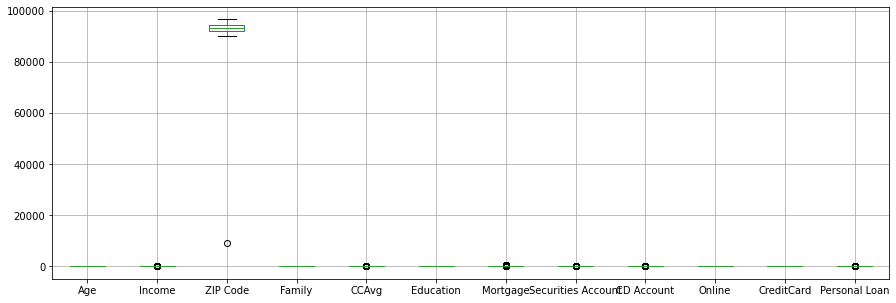

In [65]:
df.boxplot(return_type='axes', figsize=(15,5))

<AxesSubplot:title={'center':'Correlation of Attributes'}>

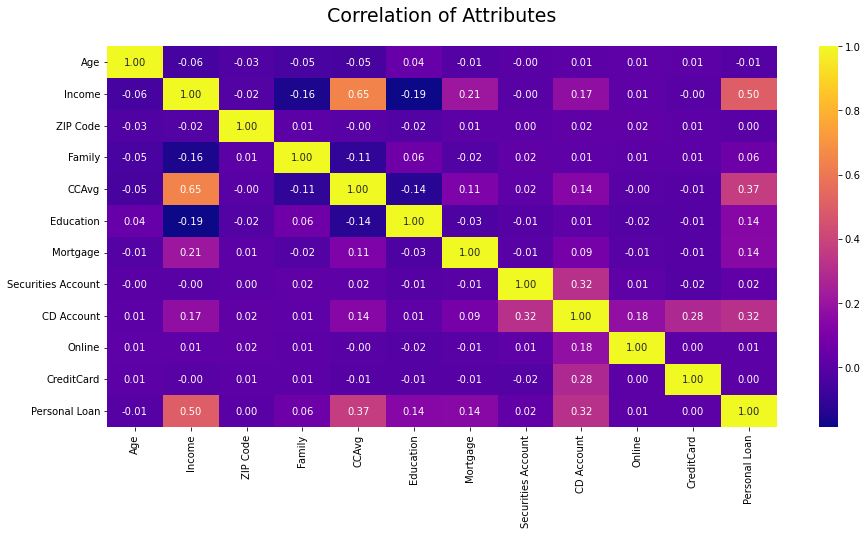

In [66]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df.corr(), cmap='plasma',annot=True, fmt='.2f')

In [67]:
df.head(1)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,49,91107,4,1.6,1,0,1,0,0,0,0


In [68]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)

In [69]:
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

In [70]:
array = df_loan
X= array.iloc[:,0:11]
y= array.iloc[:,11]

In [71]:
standardized_X = preprocessing.scale(X)
standardized_X

array([[-1.77441684, -0.53822878, -0.96411408, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.02952359, -0.8641094 , -1.44393158, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.55299157, -1.36379301,  0.73881384, ..., -0.25354028,
        -1.21661774, -0.64531434],
       ...,
       [ 1.54088033, -1.08136314, -0.0610391 , ..., -0.25354028,
        -1.21661774, -0.64531434],
       [ 1.71536965, -0.53822878, -1.46985492, ..., -0.25354028,
         0.82195086, -0.64531434],
       [-1.51268285,  0.20043396, -0.25475717, ..., -0.25354028,
         0.82195086,  1.54963239]])

In [72]:
normalized_X = preprocessing.normalize(X)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [74]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [75]:
y_pred = logreg.predict(X_test)

In [76]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.91


In [77]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [78]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1318   33]
 [ 105   44]]


In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.57      0.30      0.39       149

    accuracy                           0.91      1500
   macro avg       0.75      0.64      0.67      1500
weighted avg       0.89      0.91      0.89      1500



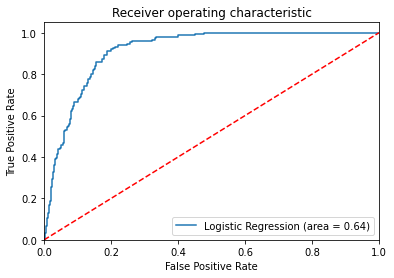

In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [81]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.130922
         Iterations 9
                          Results: Logit
Model:               Logit             Pseudo R-squared:  0.586    
Dependent Variable:  Personal Loan     AIC:               1331.2237
Date:                2022-04-12 10:05  BIC:               1402.9128
No. Observations:    5000              Log-Likelihood:    -654.61  
Df Model:            10                LL-Null:           -1581.0  
Df Residuals:        4989              LLR p-value:       0.0000   
Converged:           1.0000            Scale:             1.0000   
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Age                 0.0056   0.0064   0.8788 0.3795 -0.0069  0.0182
Income              0.0534   0.0026  20.9

In [82]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [83]:
y_pred = classifier.predict(X_test)

In [84]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(classifier.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.92


In [85]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [86]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [87]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [88]:
print("Accuracy on test set:",metrics.accuracy_score(y_test, y_pred))

Accuracy on test set: 0.8833333333333333


Text(91.68, 0.5, 'predicted label')

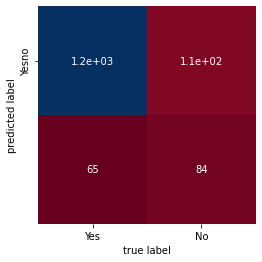

In [89]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,xticklabels=['Yes', 'No'], yticklabels=['Yes' 'no'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1351
           1       0.43      0.56      0.49       149

    accuracy                           0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500



In [91]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [92]:
y_pred = classifier.predict(X_test)

In [93]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(classifier.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.92


In [94]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [95]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1313   38]
 [ 117   32]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1351
           1       0.46      0.21      0.29       149

    accuracy                           0.90      1500
   macro avg       0.69      0.59      0.62      1500
weighted avg       0.87      0.90      0.88      1500



In [96]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

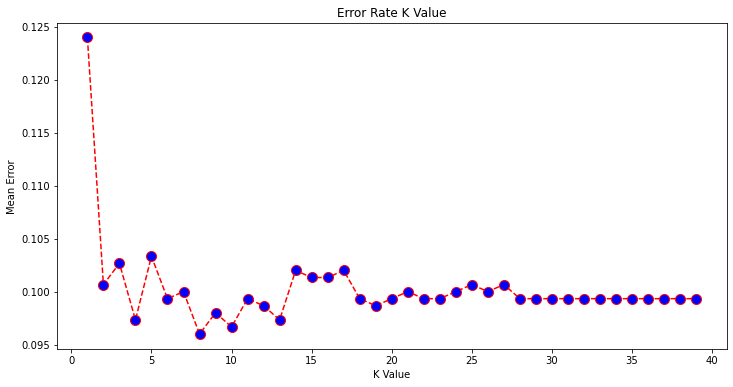

In [97]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# CONCLUSION

The logistic Regression model is the best as the accuracy of the train and test set is almost similar and also the precsion and recall accuracy is good. The confusion matrix is also better in comparision to other models.

The requirement is to classify the target. The KNN is distance based which not perfect for this situation.Though the accuracy is good but confusion matrix tells that  correct predictions is not  much acceptable.

The Naive Bayes gives less accuracy when comapared to other models implying the probability of determing the correct target is less.

# NOTES

A.Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.
Logistic Regression Assumptions
Binary logistic regression requires the dependent variable to be binary.
For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
Only the meaningful variables should be included.
The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
The independent variables are linearly related to the log odds.
Logistic regression requires quite large sample sizes


Logistic regression becomes a classification technique only when a decision threshold is brought into the picture. The setting of the threshold value is a very important aspect of Logistic regression and is dependent on the classification problem itself.

The decision for the value of the threshold value is majorly affected by the values of precision and recall
we use the following arguments to decide upon the threshold:-
1.Low Precision/High Recall
2.High Precision/Low Recall



B. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.
The target variable has two values: Positive or Negative
The columns represent the actual values of the target variable
The rows represent the predicted values of the target variable
True Positive (TP) 
True Negative (TN) 
False Positive (FP) – Type 1 error
False Negative (FN) – Type 2 error
 Precision is the ratio between the True Positives and all the Positives. 
Precision is a useful metric in cases where False Positive is a higher concern than False Negatives

Recall quantifies the number of positive class predictions made out of all positive examples in the dataset

Recall is a useful metric in cases where False Negative trumps False Positive.

The confusion matrix provides more insight into not only the performance of a predictive model, but also which classes are being predicted correctly, which incorrectly, and what type of errors are being made

C. A classification problem has a discrete value as its output. For example, “likes pineapple on pizza” and “does not like pineapple on pizza” are discrete
A supervised machine learning algorithm (as opposed to an unsupervised machine learning algorithm) is one that relies on labeled input data to learn a function that produces an appropriate output when given new unlabeled data.
Supervised machine learning algorithms are used to solve classification or regression problems.
EX: When we see a pig, we shout “pig!” When it’s not a pig, we shout “no, not pig!” After doing this several times with the child, we show them a picture and ask “pig?” and they will correctly (most of the time) say “pig!” or “no, not pig!” depending on what the picture is. That is supervised machine learning.



The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.
The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

D. Naive Bayes Algorithm  is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.